# Discretización basada en conocimiento del área

Frecuentemente, cuando se hace ingeniería de variables en un contexto de negocio, los expertos en el área determinan los intervalos en los cuales ellos creen que la variable debería ser dividida. Esto es para que dichos intervalos tengan sentido en el contexto del negocio. Los ejemplos típicos son la discretización de variables como edad e ingresos. 

Ingresos por ejemplo, son usualmente limitados a un cierto valor máximo, y todos los salarios por envima de ese valor se asignan al último intervalo. La variable age está usualmente dividida en ciertos grupos de acuerdo a la necesidad del negocio, por ejemplo una división en el intervalo 0-18 (para menores de edad), 18-30 (para adultos jóvenes), 30-40, 40-60, y > 60 (para los pensionados o cerca a pensionarse) son frecuentes.


Aprenderás como discretizar utilizando intervalos predefinidos con los datos del Titanic y los de prestamos financieros.

### Titanic dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# cargar variables numéricas Titanic Dataset

data = pd.read_csv('../titanic.csv',
                   usecols=['age', 'survived'])

data.head()

,survived,age
0,1,29.0000
1,1,0.9167
2,0,2.0000
3,0,30.0000
4,0,25.0000


Las variables age contienen datos faltantes. Los vamos a completar extrayendo una muestra aleatoria de la variable.

In [3]:
def impute_na(data, variable):
    
    # función para reemplazar NA con una muestra aleatoria

    df = data.copy()

    # muestra aleatoria
    df[variable+'_aleatoria'] = df[variable]

     # extraer muestra aleatoria para completar datos faltantes na
    random_sample = data[variable].dropna().sample(
        df[variable].isnull().sum(), random_state=0)

    # pandas necesita tener el mismo index para poder 
    # combinar los dataframes
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_aleatoria'] = random_sample

    return df[variable+'_aleatoria']

In [4]:
# reemplazar los NA 
data['age'] = impute_na(data, 'age')

In [5]:
# dividamos la variable age en los intervalos que son descritos
# en la celda introductoria del notebook

# límites del intervalo
buckets = [0, 20, 40, 60, 1000]

# etiquetas intervalo
labels = ['0-20', '20-40', '40-60', '>60']

# discretización
data['etiquetas_intervalos_age'] = pd.cut(
    data['age'], bins=buckets, labels=labels, include_lowest=True)

data['intervalos_age'] = pd.cut(data['age'], bins=buckets, include_lowest=True)

data.head()

,survived,age,etiquetas_intervalos_age,intervalos_age
0,1,29.0000,20-40,"(20.0, 40.0]"
1,1,0.9167,0-20,"(-0.001, 20.0]"
2,0,2.0000,0-20,"(-0.001, 20.0]"
3,0,30.0000,20-40,"(20.0, 40.0]"
4,0,25.0000,20-40,"(20.0, 40.0]"


In [6]:
data.tail()

,survived,age,etiquetas_intervalos_age,intervalos_age
1304,0,14.5,0-20,"(-0.001, 20.0]"
1305,0,39.0,20-40,"(20.0, 40.0]"
1306,0,26.5,20-40,"(20.0, 40.0]"
1307,0,27.0,20-40,"(20.0, 40.0]"
1308,0,29.0,20-40,"(20.0, 40.0]"


Podemos ver los intervalos en los cuales cada observación de la variable age fueron colocados. Por ejemplo, el valor 14 fue colocado en el intervalo 0-20.

Exploremos el número de observaciones y la tasa de supervivencia por intervalo después de este método arbitrario de discretización.

<AxesSubplot:xlabel='etiquetas_intervalos_age'>

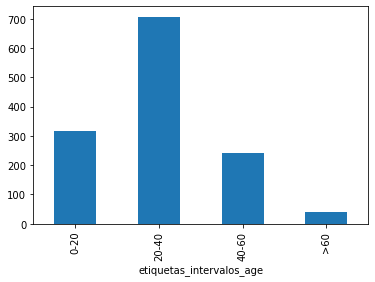

In [7]:
# Número de pasajeros por grupo de edad - age

data.groupby('etiquetas_intervalos_age')['age'].count().plot.bar()

<AxesSubplot:xlabel='etiquetas_intervalos_age'>

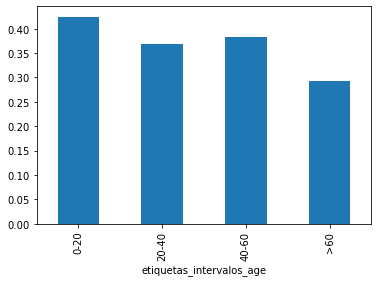

In [8]:
# tasa de supervivencia por intervalo 

data.groupby('etiquetas_intervalos_age')['survived'].mean().plot.bar()

### Peer to peer

Exploremos discretizar utlizando conocimiento del área de negocio para un escenario diferente. Usaremos el libro de préstamos de la compañía de préstamos peer to peer. Estos datos tiene información de préstamos otorgados a personas, y las caracterísicas financeras de aquellas personas así como el desempeño del préstamo.

In [9]:
# Carguemos los datos de income (ingresos) declarados por el prestamista

data = pd.read_csv('../loan.csv', usecols=['income'])

data.head()

,income
0,84600.0
1,102000.0
2,69840.0
3,100386.0
4,95040.0


In [10]:
data['income'].describe()

count    1.000000e+04
mean     7.157229e+04
std      5.286105e+04
min      0.000000e+00
25%      4.365000e+04
50%      6.045000e+04
75%      8.536000e+04
max      2.185000e+06
Name: income, dtype: float64

<AxesSubplot:>

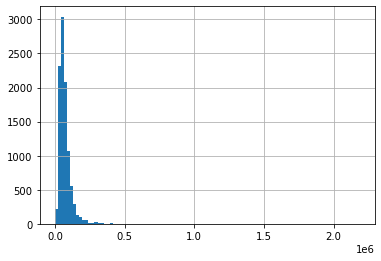

In [11]:
# exploremos la distribución de ingresos (income)

data['income'].hist(bins=100)

<AxesSubplot:>

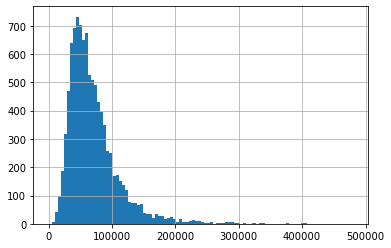

In [12]:
# miremos los bajos ingresos en más detalle

data[data['income']<500000]['income'].hist(bins=100)

Podemos ver que la mayoría de la población gana por debajo de 150,000. Por lo tanto sería bueno capturar esta información

In [13]:
# dividamos en intervalos arbitrarios, asumiendo que estos tiene sentido en 
# el contexto de negocio

# intervalo
buckets = [0, 45000, 65000, 90000, 150000, 1e10]

# etiquetas intervalo
labels = ['0-45k', '45-65k', '65-90k', '90-150k', '>150k']

# discretización
data['intervalos_income'] = pd.cut(
    data['income'], bins=buckets, labels=labels, include_lowest=True)

data.head()

,income,intervalos_income
0,84600.0,65-90k
1,102000.0,90-150k
2,69840.0,65-90k
3,100386.0,90-150k
4,95040.0,90-150k


In [14]:
data.tail()

,income,intervalos_income
9995,98000.0,90-150k
9996,36270.0,0-45k
9997,52250.0,45-65k
9998,80040.0,65-90k
9999,72000.0,65-90k


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0-45k'),
  Text(1, 0, '45-65k'),
  Text(2, 0, '65-90k'),
  Text(3, 0, '90-150k'),
  Text(4, 0, '>150k')])

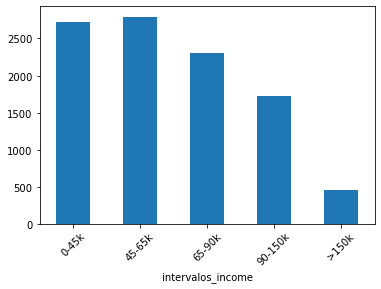

In [15]:
data.groupby(['intervalos_income'])['income'].count().plot.bar()
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0-45k'),
  Text(1, 0, '45-65k'),
  Text(2, 0, '65-90k'),
  Text(3, 0, '90-150k'),
  Text(4, 0, '>150k')])

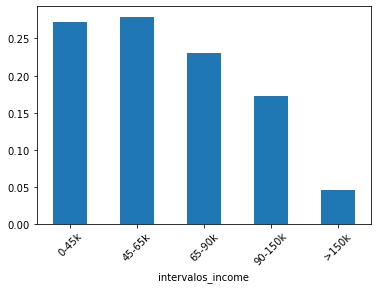

In [16]:
(data.groupby(['intervalos_income'])['income'].count()/len(data)).plot.bar()
plt.xticks(rotation=45)

Hemos capturado aproximadamente el mismo número de prestamistas en cada uno de los tres primeros intervalos, y vemos claramente, que un porcentaje pequeño de préstamos fueron otorgados a personas de altos ingresos.

**Es todo por esta demostración. Esperamos la hayan disfrutado, nos vemos en la siguiente.**